In [1]:
using DataFrames
using Statistics
using CSV
using Plots
import Pkg; Pkg.add("Polynomials")
using Polynomials

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [2]:
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [3]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [4]:
data=DataFrame(Size = Int[], Time = Float64[], Mode = Int[])
i = 1
for j=1:10
    i = i + 100
    for k=1:10
        push!(data, Dict(:Size => i, :Time => (@elapsed naive_multiplication(zeros(Float64,i,i), ones(Float64,i,i))), :Mode => 1))
        push!(data, Dict(:Size => i, :Time => (@elapsed better_multiplication(zeros(Float64,i,i), ones(Float64,i,i))), :Mode => 2))
        push!(data, Dict(:Size => i, :Time => (@elapsed zeros(Float64,i,i) * ones(Float64,i,i)), :Mode => 3))
    end
end

In [5]:
stat_data=by(data, [:Size, :Mode], :Time => mean, :Time => std)
sort!(stat_data, :Mode)

,Size,Mode,Time_mean,Time_std
,Int64,Int64,Float64,Float64
1,101,1,0.00499092,0.00376703
2,201,1,0.0943968,0.0228452
3,301,1,0.216429,0.0241369
4,401,1,0.379018,0.0177003
5,501,1,0.582476,0.0200419
6,601,1,0.971528,0.0243349
7,701,1,1.48152,0.0225861
8,801,1,2.13371,0.0237099
9,901,1,2.95074,0.0517059


In [6]:
stat_data1 = stat_data[1:10, :]
stat_data2 = stat_data[11:20, :]
stat_data3 = stat_data[21:30, :]
fit1=polyfit(stat_data1[:Size], stat_data1[:Time_mean], 4)
fit2=polyfit(stat_data2[:Size], stat_data2[:Time_mean], 4)
fit3=polyfit(stat_data3[:Size], stat_data3[:Time_mean], 4)


Poly(-0.004492778306586479 + 0.00016875021317916926*x - 6.142108171392218e-7*x^2 + 7.544964132093638e-10*x^3 - 2.7154907255243034e-13*x^4)

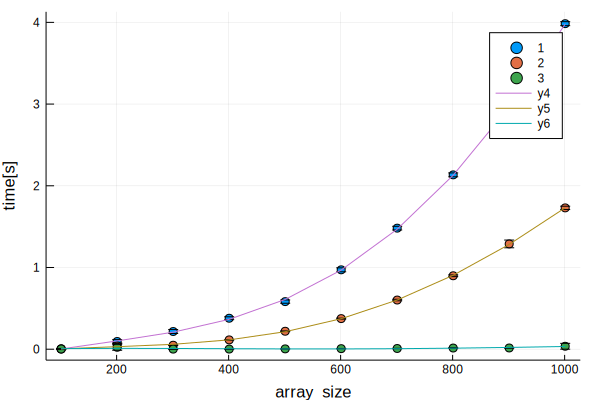

In [7]:
scatter(stat_data[:Size], stat_data[:Time_mean], group=stat_data[:Mode], xlabel="array_size", ylabel = "time[s]", yerr =stat_data[:Time_std])
xs = stat_data1[:Size]
plot!(xs, fit1(xs))
plot!(xs, fit2(xs))
plot!(xs, fit3(xs))

In [8]:
input="lab3.csv"
mydata=CSV.read(input, delim=",")

,Size,Mode,Time
,Int64⍰,Int64⍰,Float64⍰
1,101,1,0.007386
2,101,2,0.005286
3,101,3,0.001196
4,101,1,0.005987
5,101,2,0.005192
6,101,3,0.000952
7,101,1,0.006261
8,101,2,0.004752
9,101,3,0.000879


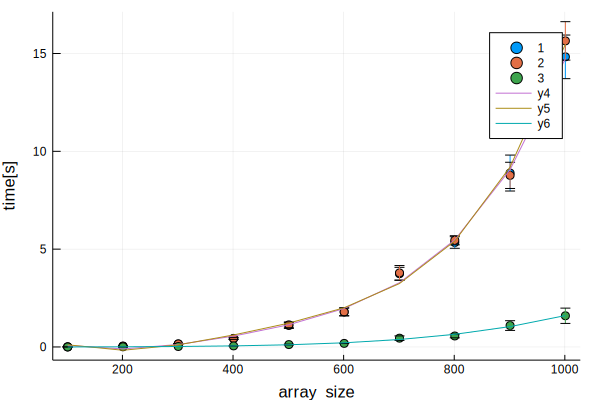

In [9]:
stat_c=by(mydata, [:Size, :Mode], :Time => mean, :Time => std)
sort!(stat_c, :Mode)
stat_c1 = stat_c[1:10, :]
stat_c2 = stat_c[11:20, :]
stat_c3 = stat_c[21:30, :]
cfit1=polyfit(stat_c1[:Size], stat_c1[:Time_mean], 4)
cfit2=polyfit(stat_c2[:Size], stat_c2[:Time_mean], 4)
cfit3=polyfit(stat_c3[:Size], stat_c3[:Time_mean], 4)
scatter(stat_c[:Size], stat_c[:Time_mean], group=stat_c[:Mode], xlabel="array_size", ylabel = "time[s]", yerr =stat_c[:Time_std])
xsc = stat_c1[:Size]
plot!(xsc, cfit1(xsc))
plot!(xsc, cfit2(xsc))
plot!(xsc, cfit3(xsc))